In [1]:
# Let's start by importing all of the libraries we'll need for our analyses

import pandas as pd

import geopandas as gpd

from shapely.geometry import Point

import contextily as ctx

import matplotlib.pyplot as plt

# for interactive plots
import plotly.express as px

import plotly.graph_objects as go

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = gpd.read_file('stn_reg_dropna.geojson')

In [4]:
df.shape

(212, 44)

In [5]:
df.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
0,06037181000,"Census Tract 1810, Los Angeles, CA",6574.0,2172.0,161.0,88.0,0.0,1039.0,137.0,941.0,33.0,0.0,545.0,360.0,7.0,185.0,17.0,363.0,0.0,104.0,0.0,6458.0,1774.0,155.0,155.0,0.0,1081.0,85.0,523.0,47.0,0.0,363.0,264.0,70.0,99.0,0.0,113.0,0.0,15.0,0.0,-5.569441,NELA,None,"MULTIPOLYGON (((-118.22860 34.14689, -118.2285..."
1,06037181300,"Census Tract 1813, Los Angeles, CA",3860.0,1428.0,188.0,77.0,8.0,845.0,144.0,491.0,77.0,0.0,244.0,165.0,35.0,79.0,0.0,170.0,0.0,15.0,1.0,4059.0,1328.0,181.0,86.0,0.0,905.0,181.0,280.0,16.0,0.0,221.0,144.0,0.0,77.0,0.0,43.0,0.0,57.0,0.0,-4.277401,NELA,None,"MULTIPOLYGON (((-118.22942 34.13411, -118.2294..."
2,06037181400,"Census Tract 1814, Los Angeles, CA",4832.0,2026.0,625.0,89.0,9.0,1160.0,303.0,775.0,0.0,0.0,679.0,326.0,47.0,353.0,227.0,96.0,39.0,2.0,0.0,4943.0,2029.0,282.0,37.0,0.0,1326.0,149.0,620.0,75.0,68.0,395.0,329.0,0.0,66.0,0.0,150.0,40.0,46.0,25.0,-0.880861,NELA,None,"MULTIPOLYGON (((-118.21897 34.14000, -118.2173..."
3,06037181500,"Census Tract 1815, Los Angeles, CA",4035.0,1683.0,183.0,113.0,30.0,806.0,101.0,762.0,125.0,0.0,637.0,271.0,0.0,366.0,52.0,0.0,0.0,2.0,0.0,3956.0,1234.0,90.0,36.0,0.0,564.0,90.0,615.0,12.0,0.0,481.0,204.0,0.0,277.0,0.0,122.0,0.0,19.0,0.0,-10.516913,NELA,None,"MULTIPOLYGON (((-118.20153 34.13351, -118.2015..."
4,06037181600,"Census Tract 1816, Los Angeles, CA",4425.0,1125.0,278.0,49.0,27.0,369.0,154.0,675.0,16.0,0.0,606.0,227.0,18.0,379.0,26.0,53.0,53.0,32.0,0.0,4631.0,1291.0,168.0,81.0,44.0,723.0,96.0,423.0,19.0,0.0,360.0,234.0,0.0,126.0,0.0,44.0,11.0,64.0,17.0,2.453619,NELA,None,"MULTIPOLYGON (((-118.21828 34.13188, -118.2181..."


In [6]:
ctk = ['station', '% Change Foreign Born']

In [7]:
elacc = df[df["station"].isin(['East LA Civic Center']
)
            ]

elacc.reset_index()

elacc = elacc.append(elacc.sum(numeric_only=True), ignore_index=True)

elacc.iloc[-1, elacc.columns.get_loc('station')] = "East LA Civic Center"

elacc = elacc.iloc[-1:]

elacc['% Change Foreign Born'] = ((elacc['19 Total Foreign Born'] / elacc['19 Total Population']) - (elacc['11 Total Foreign Born'] / elacc['11 Total Population']))*100

elacc = elacc[ctk]

elacc.head()



,station,% Change Foreign Born
8,East LA Civic Center,-4.862695


In [8]:
eastla = df[df["region"].isin(['East LA']
)
            ]

eastla.reset_index()

eastla = eastla.append(eastla.sum(numeric_only=True), ignore_index=True)

eastla.iloc[-1, eastla.columns.get_loc('station')] = "East LA"

eastla = eastla.iloc[-1:]

eastla['% Change Foreign Born'] = ((eastla['19 Total Foreign Born'] / eastla['19 Total Population']) - (eastla['11 Total Foreign Born'] / eastla['11 Total Population']))*100

eastla = eastla[ctk]

eastla.head()



,station,% Change Foreign Born
14,East LA,0.432542


In [9]:
mplaza = df[df["station"].isin(['Mariachi']
)
            ]

mplaza.reset_index()

mplaza = mplaza.append(mplaza.sum(numeric_only=True), ignore_index=True)

mplaza.iloc[-1, mplaza.columns.get_loc('station')] = "Mariachi"

mplaza = mplaza.iloc[-1:]

mplaza['% Change Foreign Born'] = ((mplaza['19 Total Foreign Born'] / mplaza['19 Total Population']) - (mplaza['11 Total Foreign Born'] / mplaza['11 Total Population']))*100

mplaza = mplaza[ctk]

mplaza.head()

,station,% Change Foreign Born
7,Mariachi,-5.466961


In [10]:
cela = df[df["region"].isin(['Central East LA']
)
            ]

cela.reset_index()

cela = cela.append(cela.sum(numeric_only=True), ignore_index=True)

cela.iloc[-1, cela.columns.get_loc('station')] = "Central East LA"

cela = cela.iloc[-1:]

cela['% Change Foreign Born'] = ((cela['19 Total Foreign Born'] / cela['19 Total Population']) - (cela['11 Total Foreign Born'] / cela['11 Total Population']))*100

cela = cela[ctk]

cela.head()




,station,% Change Foreign Born
60,Central East LA,-4.980569


In [11]:
ctown = df[df["station"].isin(['Chinatown']
)
            ]

ctown.reset_index()

ctown = ctown.append(ctown.sum(numeric_only=True), ignore_index=True)

ctown.iloc[-1, ctown.columns.get_loc('station')] = "Chinatown"

ctown = ctown.iloc[-1:]

ctown['% Change Foreign Born'] = ((ctown['19 Total Foreign Born'] / ctown['19 Total Population']) - (ctown['11 Total Foreign Born'] / ctown['11 Total Population']))*100

ctown = ctown[ctk]

ctown.head()



,station,% Change Foreign Born
4,Chinatown,-7.64756


In [12]:
cla = df[df["region"].isin(['Central LA']
)
            ]

cla.reset_index()

cla = cla.append(cla.sum(numeric_only=True), ignore_index=True)

cla.iloc[-1, cla.columns.get_loc('station')] = "Central LA"

cla = cla.iloc[-1:]

cla['% Change Foreign Born'] = ((cla['19 Total Foreign Born'] / cla['19 Total Population']) - (cla['11 Total Foreign Born'] / cla['11 Total Population']))*100

cla = cla[ctk]

cla.head()



,station,% Change Foreign Born
18,Central LA,-8.214435


In [13]:
heritage = df[df["station"].isin(['Heritage']
)
            ]

heritage.reset_index()

heritage = heritage.append(heritage.sum(numeric_only=True), ignore_index=True)

heritage.iloc[-1, heritage.columns.get_loc('station')] = "Heritage"

heritage = heritage.iloc[-1:]

heritage['% Change Foreign Born'] = ((heritage['19 Total Foreign Born'] / heritage['19 Total Population']) - (heritage['11 Total Foreign Born'] / heritage['11 Total Population']))*100

heritage = heritage[ctk]

heritage.head()



,station,% Change Foreign Born
5,Heritage,-2.705435


In [14]:
hlp = df[df["station"].isin(["Highland Park"]
)
            ]

hlp.reset_index()

hlp = hlp.append(hlp.sum(numeric_only=True), ignore_index=True)

hlp.iloc[-1, hlp.columns.get_loc('station')] = "Highland Park"

hlp = hlp.iloc[-1:]

hlp['% Change Foreign Born'] = ((hlp['19 Total Foreign Born'] / hlp['19 Total Population']) - (hlp['11 Total Foreign Born'] / hlp['11 Total Population']))*100

hlp = hlp[ctk]

hlp.head()



,station,% Change Foreign Born
7,Highland Park,-6.965553


In [15]:
NELA = df[df["region"].isin(['NELA']
)
            ]

NELA.reset_index()

NELA = NELA.append(NELA.sum(numeric_only=True), ignore_index=True)

NELA.iloc[-1, NELA.columns.get_loc('station')] = "NELA"

NELA = NELA.iloc[-1:]

NELA['% Change Foreign Born'] = ((NELA['19 Total Foreign Born'] / NELA['19 Total Population']) - (NELA['11 Total Foreign Born'] / NELA['11 Total Population']))*100

NELA = NELA[ctk]

NELA.head()



,station,% Change Foreign Born
56,NELA,-4.815682


In [16]:
dmar = df[df["station"].isin(["Del Mar"]
)
            ]

dmar.reset_index()

dmar = dmar.append(dmar.sum(numeric_only=True), ignore_index=True)

dmar.iloc[-1, dmar.columns.get_loc('station')] = "Del Mar"

dmar = dmar.iloc[-1:]

dmar['% Change Foreign Born'] = ((dmar['19 Total Foreign Born'] / dmar['19 Total Population']) - (dmar['11 Total Foreign Born'] / dmar['11 Total Population']))*100

dmar = dmar[ctk]

dmar.head()



,station,% Change Foreign Born
3,Del Mar,2.267495


In [17]:
pas = df[df["region"].isin(["Pasadena"]
)
            ]

pas.reset_index()

pas = pas.append(pas.sum(numeric_only=True), ignore_index=True)

pas.iloc[-1, pas.columns.get_loc('station')] = "Pasadena"

pas = pas.iloc[-1:]

pas['% Change Foreign Born'] = ((pas['19 Total Foreign Born'] / pas['19 Total Population']) - (pas['11 Total Foreign Born'] / pas['11 Total Population']))*100

pas = pas[ctk]

pas.head()


,station,% Change Foreign Born
33,Pasadena,-1.570334


In [18]:
arc = df[df["station"].isin(["Arcadia"]
)
            ]

arc.reset_index()

arc = arc.append(arc.sum(numeric_only=True), ignore_index=True)

arc.iloc[-1, arc.columns.get_loc('station')] = "Arcadia"

arc = arc.iloc[-1:]

arc['% Change Foreign Born'] = ((arc['19 Total Foreign Born'] / arc['19 Total Population']) - (arc['11 Total Foreign Born'] / arc['11 Total Population']))*100

arc = arc[ctk]

arc.head()



,station,% Change Foreign Born
3,Arcadia,0.713924


In [19]:
sgv = df[df["region"].isin(["San Gabriel Valley"]
)
            ]

In [20]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
105,06037430301,"Census Tract 4303.01, Los Angeles, CA",4177.0,631.0,50.0,214.0,13.0,111.0,28.0,282.0,46.0,0.0,209.0,133.0,9.0,76.0,0.0,27.0,0.0,24.0,0.0,4319.0,690.0,64.0,111.0,18.0,424.0,39.0,119.0,24.0,0.0,66.0,44.0,0.0,22.0,7.0,29.0,0.0,36.0,0.0,0.869385,San Gabriel Valley,None,"MULTIPOLYGON (((-118.02191 34.15705, -118.0212..."
106,06037430302,"Census Tract 4303.02, Los Angeles, CA",5767.0,633.0,69.0,107.0,0.0,253.0,69.0,207.0,14.0,0.0,140.0,140.0,0.0,0.0,0.0,53.0,0.0,66.0,0.0,5339.0,805.0,109.0,108.0,0.0,352.0,109.0,249.0,9.0,0.0,238.0,159.0,0.0,79.0,0.0,2.0,0.0,96.0,0.0,4.101486,San Gabriel Valley,None,"MULTIPOLYGON (((-118.02123 34.15454, -118.0212..."
107,06037430400,"Census Tract 4304, Los Angeles, CA",4877.0,2002.0,295.0,79.0,59.0,1683.0,222.0,206.0,30.0,14.0,102.0,76.0,0.0,26.0,0.0,74.0,0.0,34.0,0.0,4642.0,2167.0,408.0,73.0,12.0,1974.0,389.0,103.0,54.0,0.0,25.0,25.0,0.0,0.0,0.0,24.0,0.0,17.0,7.0,5.632639,San Gabriel Valley,Arcadia,"MULTIPOLYGON (((-118.03194 34.16693, -118.0318..."
108,06037430600,"Census Tract 4306, Los Angeles, CA",4420.0,1528.0,157.0,161.0,0.0,1177.0,119.0,88.0,20.0,0.0,23.0,23.0,0.0,0.0,0.0,45.0,0.0,102.0,38.0,4553.0,1796.0,239.0,60.0,11.0,1662.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,4.876383,San Gabriel Valley,None,"MULTIPOLYGON (((-118.06796 34.15682, -118.0678..."
109,06037430701,"Census Tract 4307.01, Los Angeles, CA",5363.0,2132.0,563.0,175.0,55.0,1784.0,480.0,112.0,20.0,0.0,49.0,49.0,0.0,0.0,0.0,43.0,15.0,61.0,13.0,5846.0,2414.0,853.0,71.0,40.0,2144.0,779.0,143.0,11.0,0.0,47.0,11.0,0.0,36.0,0.0,85.0,34.0,56.0,0.0,1.539323,San Gabriel Valley,None,"MULTIPOLYGON (((-118.06921 34.13106, -118.0691..."


In [21]:
sgv.reset_index()

sgv = sgv.append(sgv.sum(numeric_only=True), ignore_index=True)

In [22]:
sgv.tail()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
27,06037480101,"Census Tract 4801.01, Los Angeles, CA",4060.0,1870.0,364.0,0.0,0.0,1824.0,364.0,46.0,0.0,0.0,46.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3731.0,2089.0,574.0,22.0,0.0,2035.0,574.0,32.0,10.0,0.0,22.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,9.931238,San Gabriel Valley,None,"MULTIPOLYGON (((-118.08046 34.11352, -118.0803..."
28,06037480102,"Census Tract 4801.02, Los Angeles, CA",4096.0,1903.0,403.0,19.0,0.0,1567.0,353.0,297.0,26.0,1.0,214.0,194.0,18.0,20.0,0.0,57.0,31.0,20.0,0.0,4487.0,1970.0,246.0,70.0,10.0,1672.0,229.0,174.0,28.0,0.0,113.0,95.0,0.0,18.0,0.0,33.0,0.0,54.0,7.0,-2.555348,San Gabriel Valley,None,"MULTIPOLYGON (((-118.09106 34.10807, -118.0909..."
29,06037481201,"Census Tract 4812.01, Los Angeles, CA",3343.0,1656.0,408.0,20.0,0.0,1417.0,408.0,219.0,0.0,0.0,219.0,80.0,0.0,139.0,0.0,0.0,0.0,0.0,0.0,3910.0,2241.0,251.0,8.0,8.0,1722.0,220.0,511.0,0.0,0.0,511.0,433.0,23.0,78.0,0.0,0.0,0.0,0.0,0.0,7.778233,San Gabriel Valley,None,"MULTIPOLYGON (((-118.07721 34.10341, -118.0762..."
30,06037481202,"Census Tract 4812.02, Los Angeles, CA",5652.0,3093.0,511.0,47.0,0.0,2103.0,363.0,866.0,14.0,0.0,756.0,700.0,93.0,56.0,15.0,96.0,23.0,77.0,17.0,6188.0,3466.0,715.0,17.0,0.0,2659.0,657.0,782.0,8.0,0.0,764.0,610.0,58.0,154.0,0.0,10.0,0.0,8.0,0.0,1.287644,San Gabriel Valley,None,"MULTIPOLYGON (((-118.09099 34.10340, -118.0905..."
31,NaN,NaN,151933.0,64841.0,14681.0,1862.0,251.0,50402.0,11857.0,11133.0,508.0,26.0,9137.0,7106.0,1568.0,2031.0,364.0,1488.0,342.0,1444.0,273.0,156119.0,68375.0,12051.0,1870.0,320.0,54428.0,10858.0,10765.0,412.0,13.0,9347.0,7569.0,329.0,1778.0,172.0,1006.0,80.0,1312.0,279.0,44.791013,NaN,NaN,None


In [23]:
sgv.iloc[-1, sgv.columns.get_loc('station')] = "San Gabriel Valley"

In [24]:
sgv.tail(1)

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
31,NaN,NaN,151933.0,64841.0,14681.0,1862.0,251.0,50402.0,11857.0,11133.0,508.0,26.0,9137.0,7106.0,1568.0,2031.0,364.0,1488.0,342.0,1444.0,273.0,156119.0,68375.0,12051.0,1870.0,320.0,54428.0,10858.0,10765.0,412.0,13.0,9347.0,7569.0,329.0,1778.0,172.0,1006.0,80.0,1312.0,279.0,44.791013,NaN,San Gabriel Valley,None


In [25]:
sgv = sgv.iloc[-1:]

In [26]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
31,NaN,NaN,151933.0,64841.0,14681.0,1862.0,251.0,50402.0,11857.0,11133.0,508.0,26.0,9137.0,7106.0,1568.0,2031.0,364.0,1488.0,342.0,1444.0,273.0,156119.0,68375.0,12051.0,1870.0,320.0,54428.0,10858.0,10765.0,412.0,13.0,9347.0,7569.0,329.0,1778.0,172.0,1006.0,80.0,1312.0,279.0,44.791013,NaN,San Gabriel Valley,None


In [27]:
sgv['% Change Foreign Born'] = ((sgv['19 Total Foreign Born'] / sgv['19 Total Population']) - (sgv['11 Total Foreign Born'] / sgv['11 Total Population']))*100

In [28]:
sgv.head()

,FIPS,Census Tract,11 Total Population,11 Total Foreign Born,11 Total Entered 2000 or later,11 Europe,11 Europe Entered 2000 or later,11 Asia,11 Asia Entered 2000 or later,11 Latin America,11 Caribbean,11 Caribbean Entered 2000 or later,11 Central America,11 Mexico,11 Mexico Entered 2000 or later,11 Other Central America,11 Other Central America 2000 or later,11 South America,11 South America Entered 2000 or later,11 Other areas,11 Other areas Entered 2000 or later,19 Total Population,19 Total Foreign Born,19 Total Entered 2010 or later,19 Europe,19 Europe Entered 2010 or later,19 Asia,19 Asia Entered 2010 or later,19 Latin America,19 Caribbean,19 Caribbean entered 2010 or later,19 Central America,19 Mexico,19 Mexico Entered 2010 or later,19 Other Central America,19 Other Central America Entered 2010 or later,19 South America,19 South America Entered 2010 or later,19 Other Areas,19 Other Areas Entered 2010 or later,% Change Foreign Born,region,station,geometry
31,NaN,NaN,151933.0,64841.0,14681.0,1862.0,251.0,50402.0,11857.0,11133.0,508.0,26.0,9137.0,7106.0,1568.0,2031.0,364.0,1488.0,342.0,1444.0,273.0,156119.0,68375.0,12051.0,1870.0,320.0,54428.0,10858.0,10765.0,412.0,13.0,9347.0,7569.0,329.0,1778.0,172.0,1006.0,80.0,1312.0,279.0,1.119355,NaN,San Gabriel Valley,None


In [29]:
sgv = sgv[ctk]

In [30]:
sgv.head()

,station,% Change Foreign Born
31,San Gabriel Valley,1.119355


In [31]:
frames = [elacc, 
          eastla,
          mplaza, 
          cela, 
          ctown, 
          cla, 
          heritage, 
          hlp, 
          NELA, 
          dmar, 
          pas, 
          arc, 
          sgv
         ]

In [32]:
chart = pd.concat(frames)

In [33]:
chart

,station,% Change Foreign Born
8,East LA Civic Center,-4.862695
14,East LA,0.432542
7,Mariachi,-5.466961
60,Central East LA,-4.980569
4,Chinatown,-7.647560
18,Central LA,-8.214435
5,Heritage,-2.705435
7,Highland Park,-6.965553
56,NELA,-4.815682
3,Del Mar,2.267495


In [34]:
chart = chart.reset_index()

In [35]:
chart

,index,station,% Change Foreign Born
0,8,East LA Civic Center,-4.862695
1,14,East LA,0.432542
2,7,Mariachi,-5.466961
3,60,Central East LA,-4.980569
4,4,Chinatown,-7.647560
5,18,Central LA,-8.214435
6,5,Heritage,-2.705435
7,7,Highland Park,-6.965553
8,56,NELA,-4.815682
9,3,Del Mar,2.267495


In [36]:
chart = chart.rename(columns={'station': 'Station / Region'})

In [37]:
chart = chart.drop(['index'], axis=1)

In [38]:
chart.loc[0, 'Area'] = "Station"
chart.loc[2, 'Area'] = "Station"
chart.loc[4, 'Area'] = "Station"
chart.loc[6, 'Area'] = "Station"
chart.loc[7, 'Area'] = "Station"
chart.loc[9, 'Area'] = "Station"
chart.loc[11, 'Area'] = "Station"

In [39]:
chart

,Station / Region,% Change Foreign Born,Area
0,East LA Civic Center,-4.862695,Station
1,East LA,0.432542,NaN
2,Mariachi,-5.466961,Station
3,Central East LA,-4.980569,NaN
4,Chinatown,-7.647560,Station
5,Central LA,-8.214435,NaN
6,Heritage,-2.705435,Station
7,Highland Park,-6.965553,Station
8,NELA,-4.815682,NaN
9,Del Mar,2.267495,Station


In [40]:
chart.loc[1, 'Area'] = "Region"
chart.loc[3, 'Area'] = "Region"
chart.loc[5, 'Area'] = "Region"
chart.loc[8, 'Area'] = "Region"
chart.loc[10, 'Area'] = "Region"
chart.loc[12, 'Area'] = "Region"

In [45]:
chart

,Station / Region,% Change Foreign Born,Area
0,East LA Civic Center,-4.862695,Station
1,East LA,0.432542,Region
2,Mariachi,-5.466961,Station
3,Central East LA,-4.980569,Region
4,Chinatown,-7.647560,Station
5,Central LA,-8.214435,Region
6,Heritage,-2.705435,Station
7,Highland Park,-6.965553,Station
8,NELA,-4.815682,Region
9,Del Mar,2.267495,Station


In [47]:
chart.to_csv("comparisongraphchart.csv")

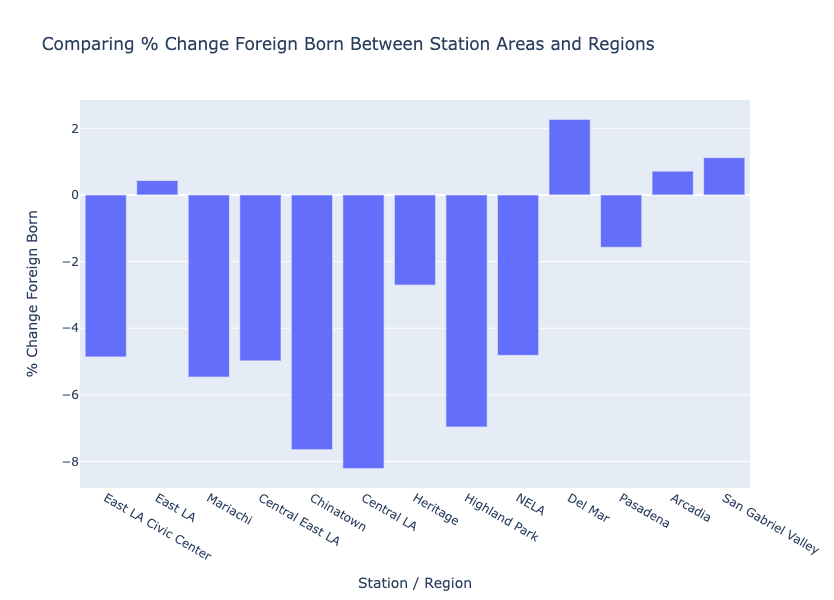

In [83]:
fig = px.bar(chart, x='Station / Region', y='% Change Foreign Born',
             barmode='group', 
             title='Comparing % Change Foreign Born Between Station Areas and Regions', 
             height=600)

fig.update_layout(xaxis_title="Station / Region")

fig.show()

In [84]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   FIPS                                            212 non-null    object  
 1   Census Tract                                    212 non-null    object  
 2   11 Total Population                             212 non-null    float64 
 3   11 Total Foreign Born                           212 non-null    float64 
 4   11 Total Entered 2000 or later                  212 non-null    float64 
 5   11 Europe                                       212 non-null    float64 
 6   11 Europe Entered 2000 or later                 212 non-null    float64 
 7   11 Asia                                         212 non-null    float64 
 8   11 Asia Entered 2000 or later                   212 non-null    float64 
 9   11 Latin America        

## 7 charts - comparison bar chart w/ station in one color and region in another, country of origin on x axis, percent change foreign born on y

In [48]:
stations = ['East LA Civic Center', 'Mariachi', 'Chinatown', 'Heritage', 'Highland Park', 'Del Mar', 'Arcadia']

regions = ['East LA', 'Central East LA', 'Central LA', 'NELA', 'Pasadena', 'San Gabriel Valley']

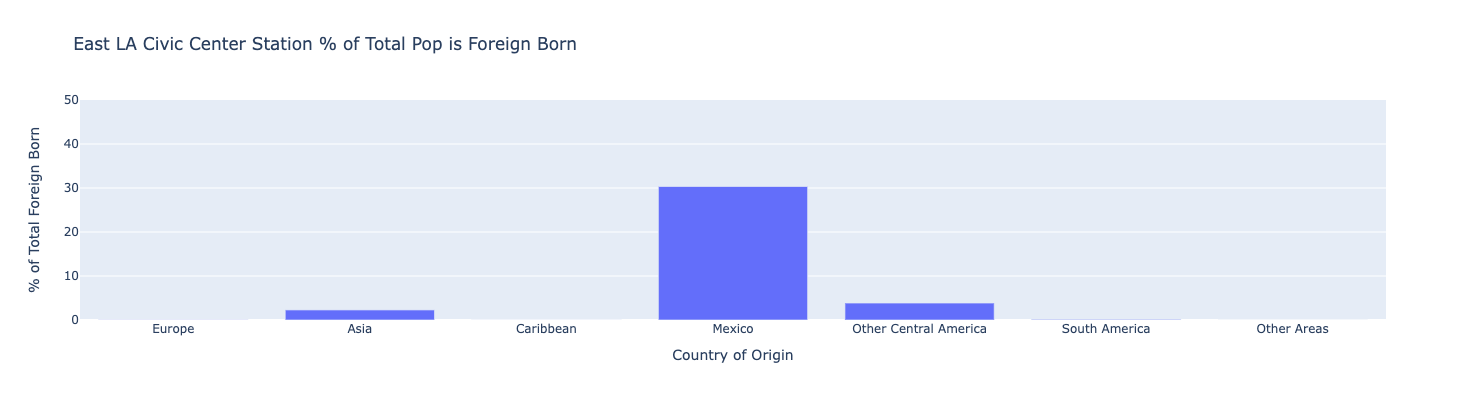

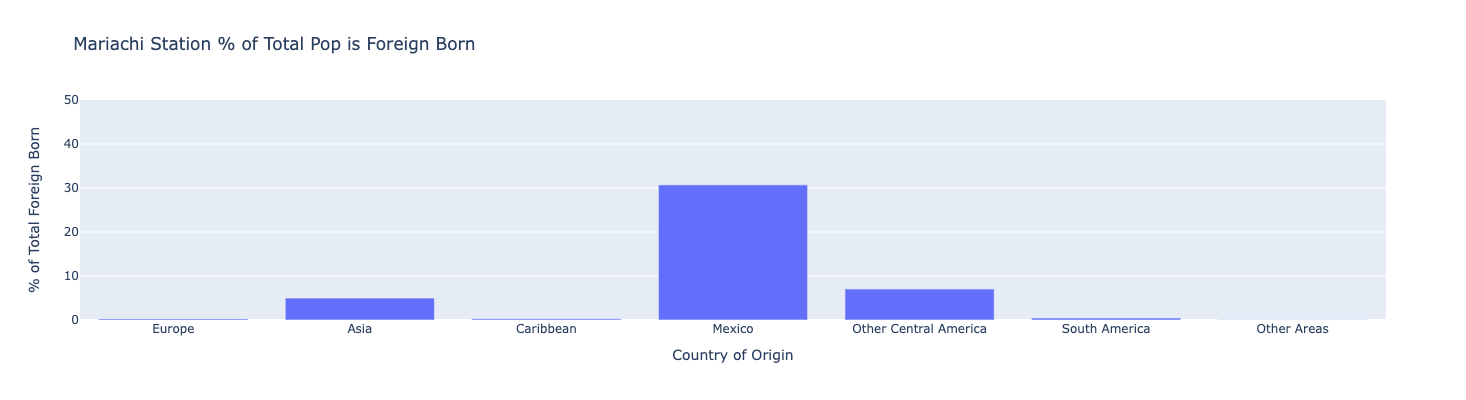

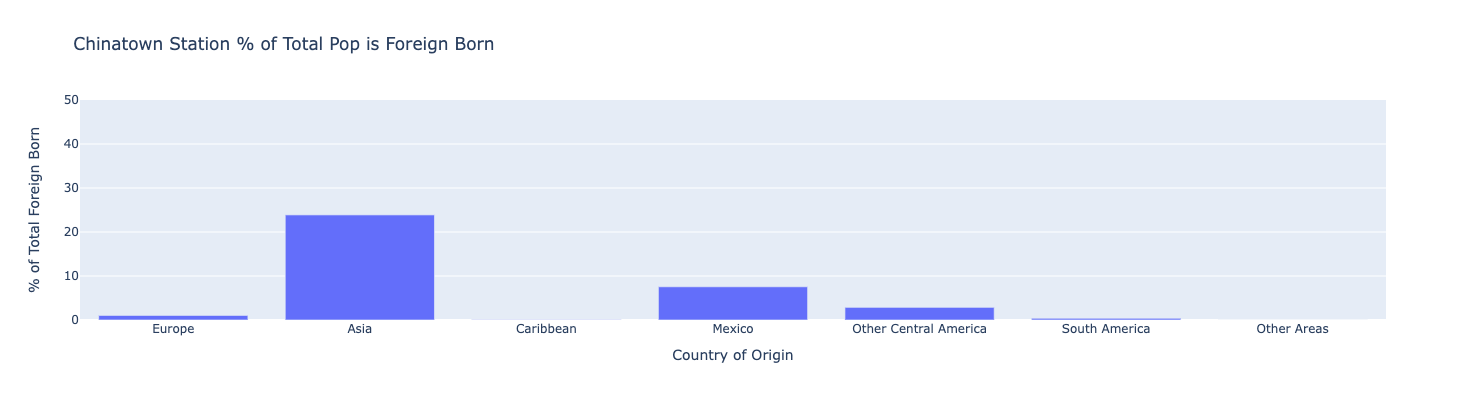

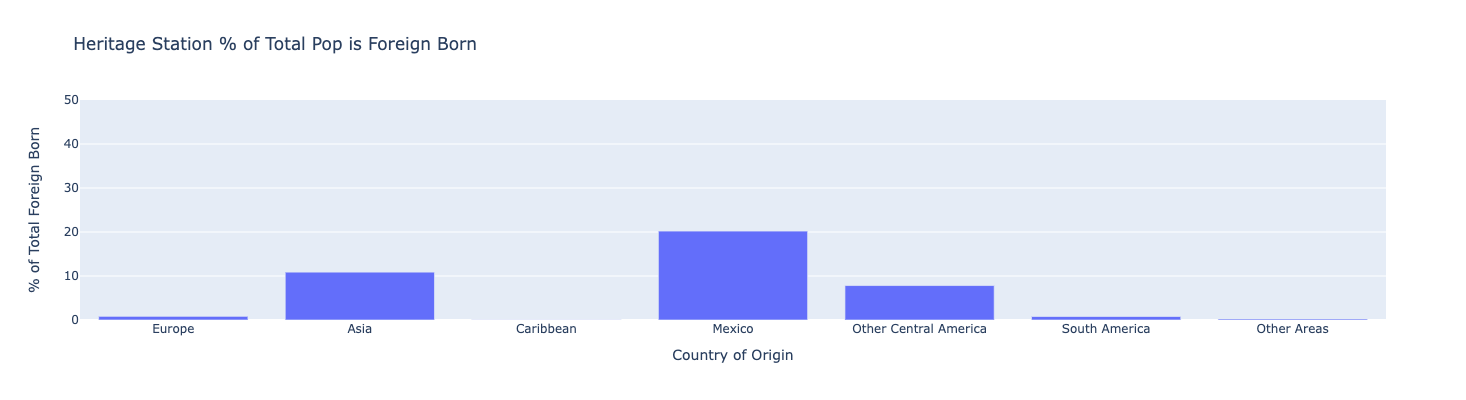

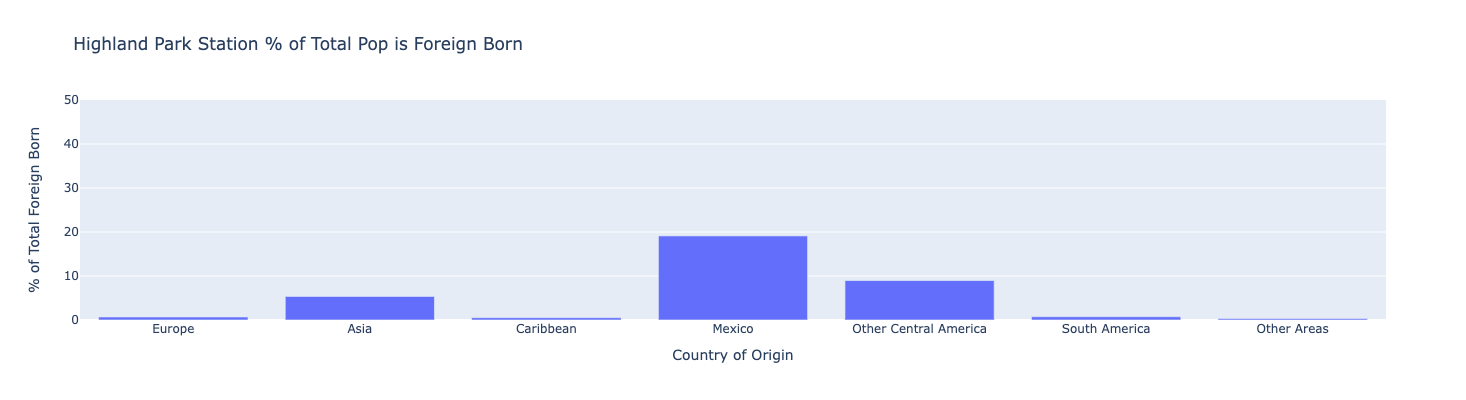

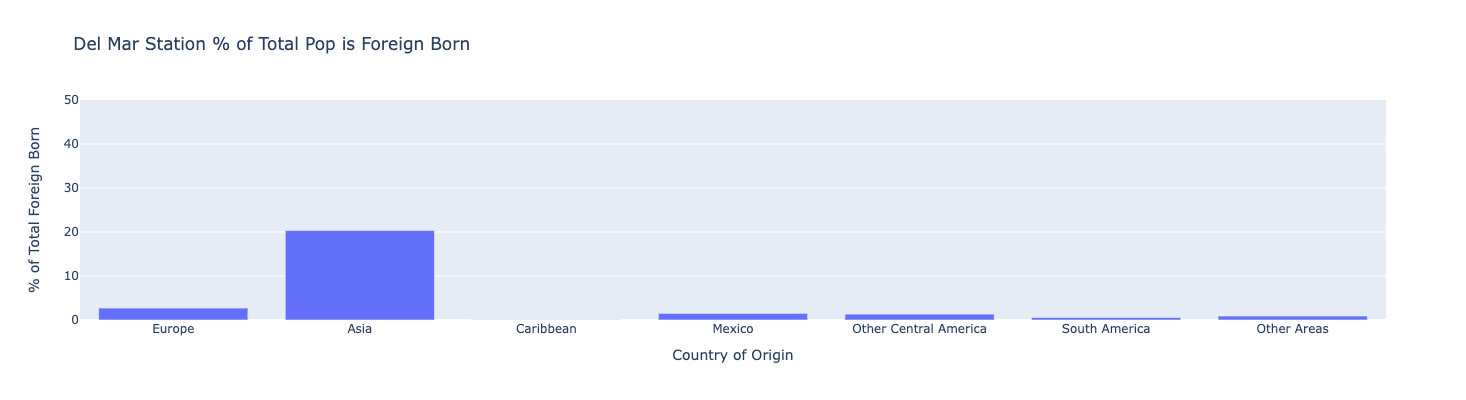

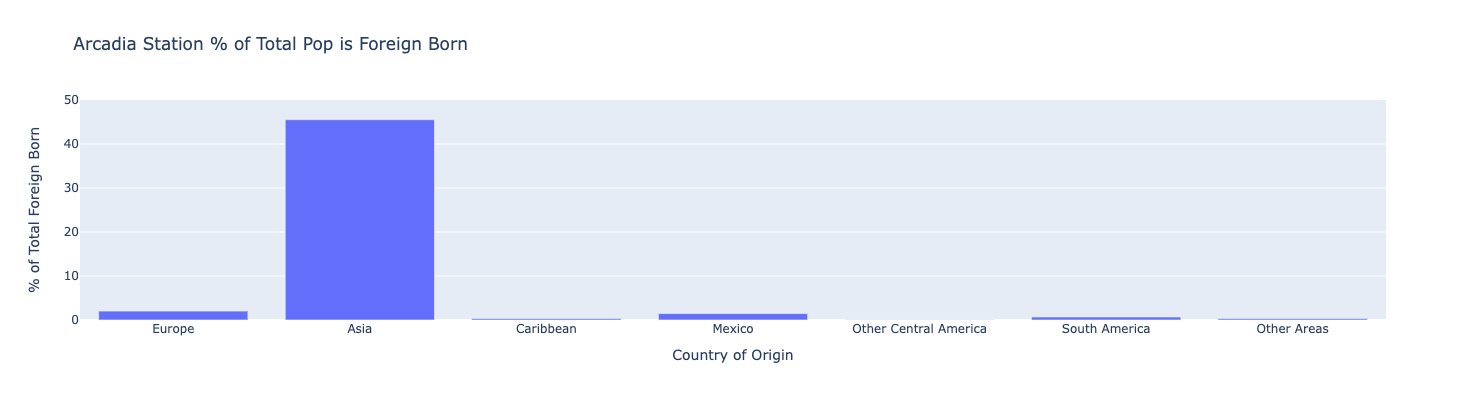

In [54]:
def stn_chart_country(station = 'East LA Civic Center'):

    gdf = df[df["station"].isin([station])]

    # Creating our summation row, since we're not breaking it down by census tract
    gdf = gdf.append(gdf.sum(numeric_only=True), ignore_index=True)

    # Keeping only summation row
    gdf = gdf.iloc[-1:]
    
    gdf = gdf.drop(columns=['FIPS', 'Census Tract'], axis=1)

    gdf['Europe'] = gdf['19 Europe']/gdf['19 Total Population']*100
    gdf['Asia'] = gdf['19 Asia']/gdf['19 Total Population']*100
    gdf['Caribbean'] = gdf['19 Caribbean']/gdf['19 Total Population']*100
    gdf['Mexico'] = gdf['19 Mexico']/gdf['19 Total Population']*100
    gdf['Other Central America'] = gdf['19 Other Central America']/gdf['19 Total Population']*100
    gdf['South America'] = gdf['19 South America']/gdf['19 Total Population']*100
    gdf['Other Areas'] = gdf['19 Other Areas Entered 2010 or later']/gdf['19 Total Population']*100
    
    ctk = ['Europe',
           'Asia',
           'Caribbean',
           'Mexico',
           'Other Central America',
           'South America',
           'Other Areas']
    
    gdf = gdf[ctk]
    
    # Flipping rows and columns
    gdf = gdf.transpose()
    
    # Reseting index
    gdf = gdf.reset_index()
    
    # Renaming columns
    gdf.columns = ['Country of Origin', '% of Total Foreign Born']
    
    fig = px.bar(gdf, x='Country of Origin', y='% of Total Foreign Born',
              barmode='group',
              title=station + " Station % of Total Pop is Foreign Born", 
              height=400)
    
    fig.update_yaxes(range=[0, 50])
   
    fig.show()

for station in stations:
    stn_chart_country(station = station)

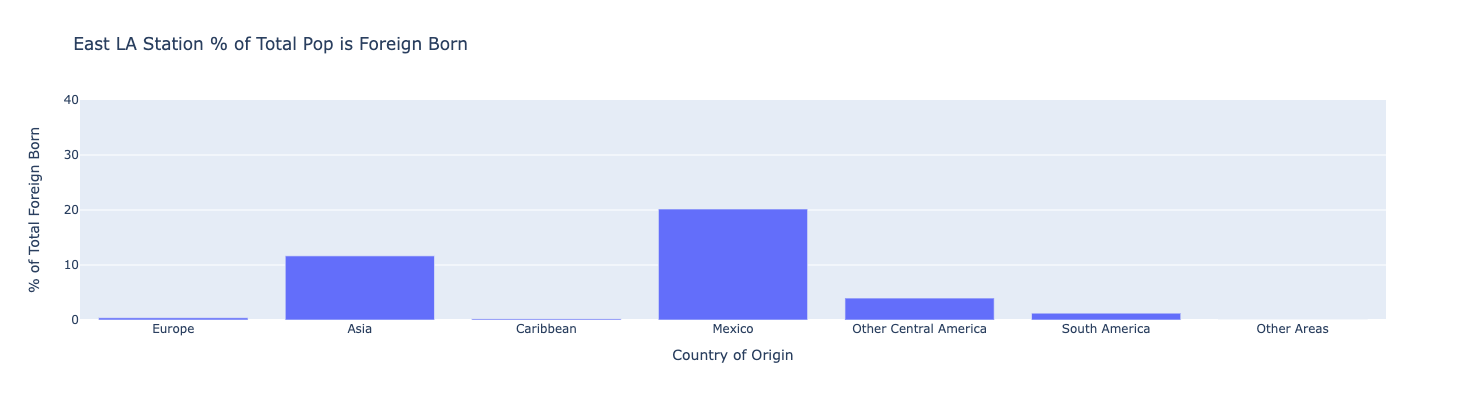

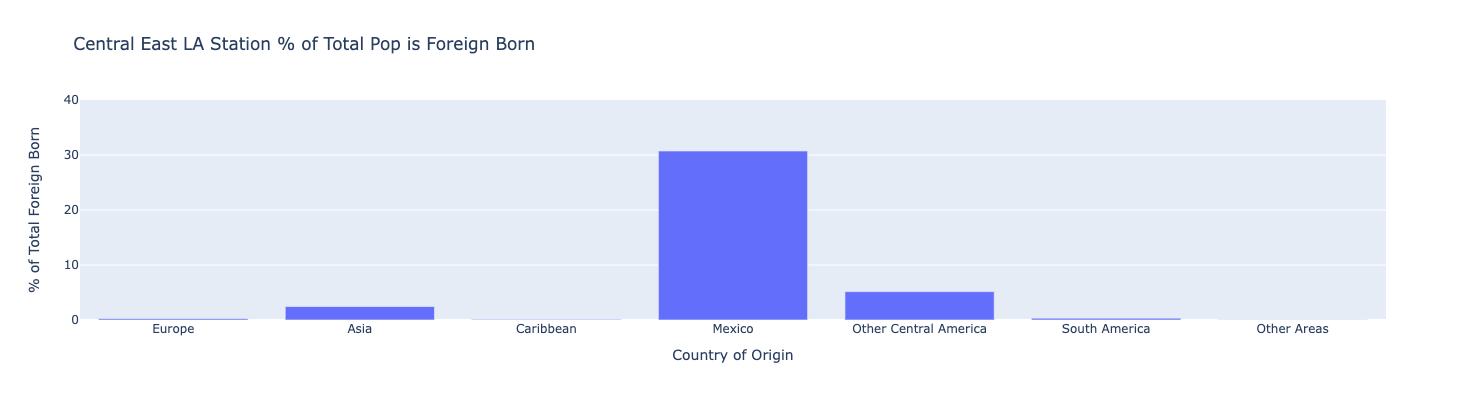

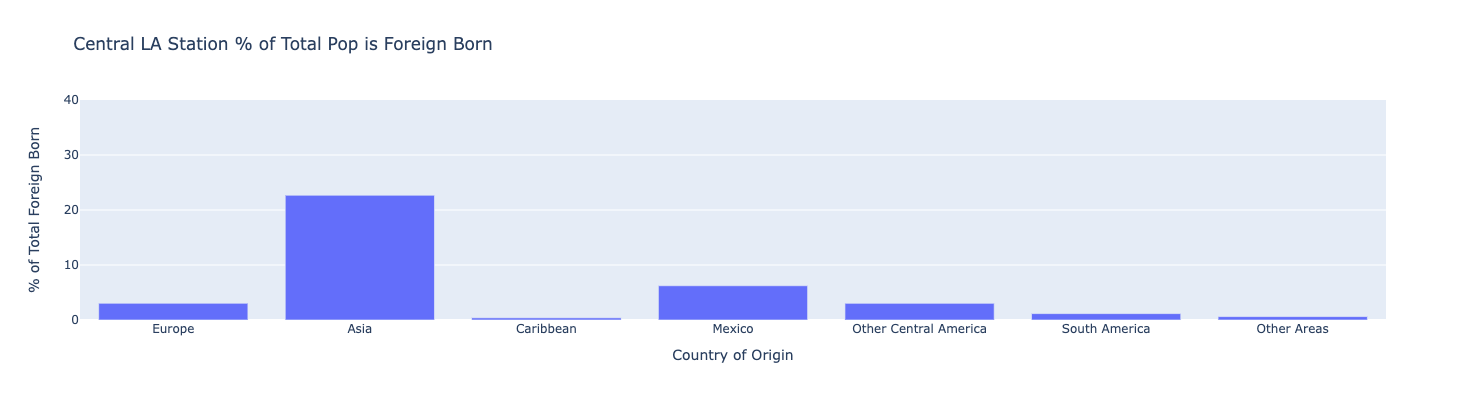

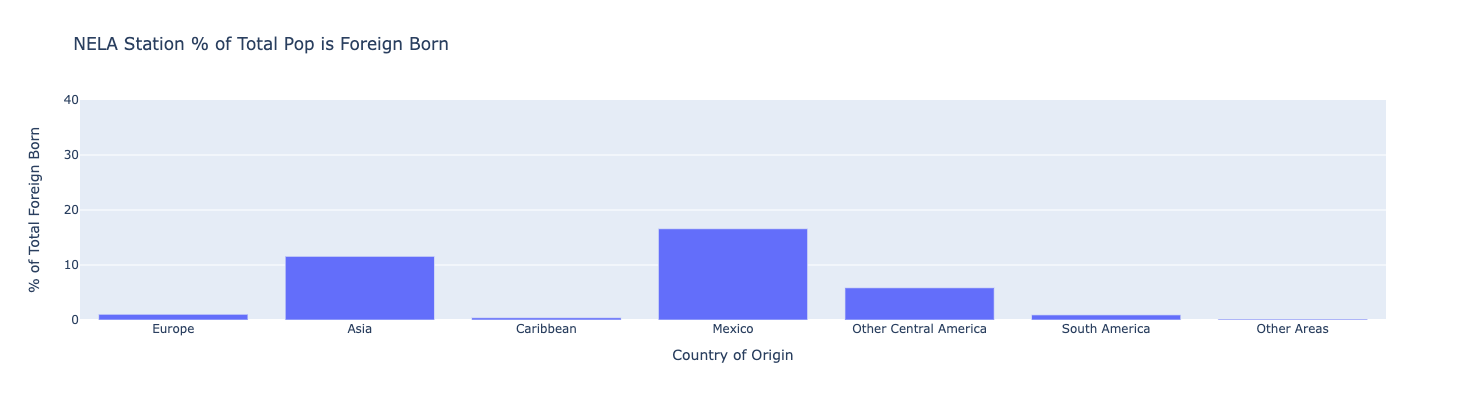

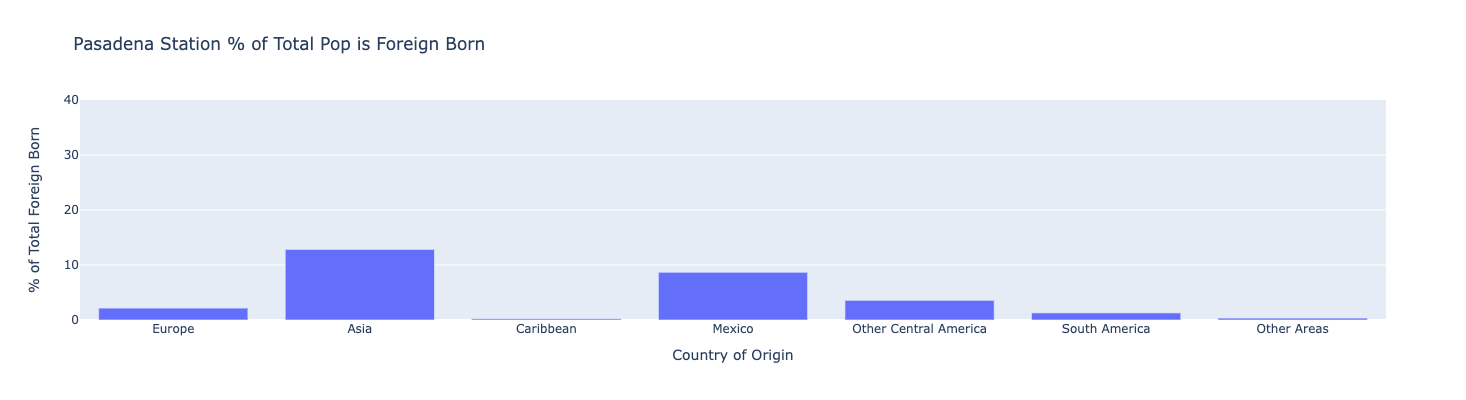

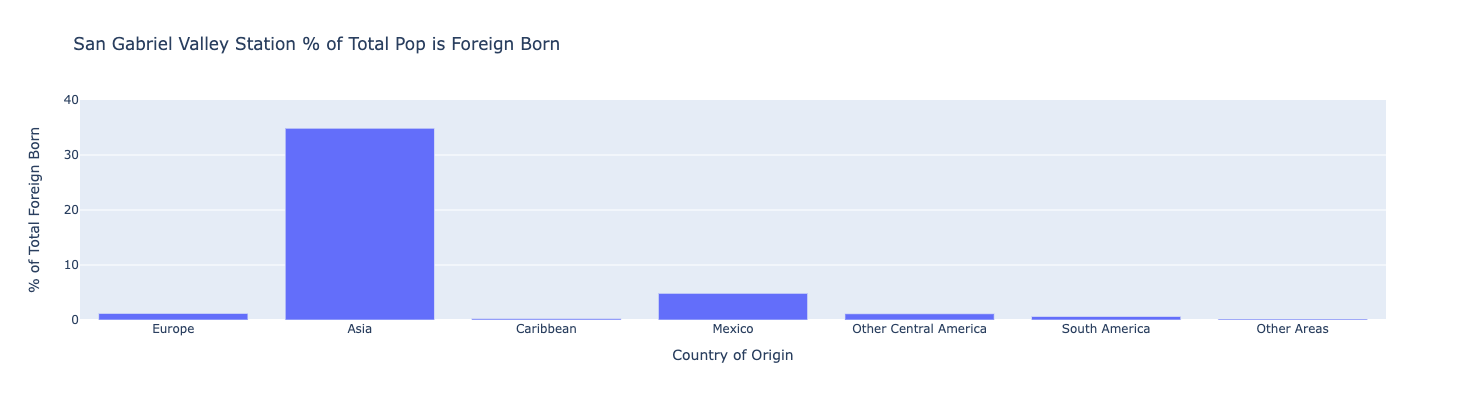

In [53]:
def rgn_chart_country(region = 'East LA'):

    gdf = df[df["region"].isin([region])]

    # Creating our summation row, since we're not breaking it down by census tract
    gdf = gdf.append(gdf.sum(numeric_only=True), ignore_index=True)

    # Keeping only summation row
    gdf = gdf.iloc[-1:]
    
    gdf = gdf.drop(columns=['FIPS', 'Census Tract'], axis=1)

    gdf['Europe'] = gdf['19 Europe']/gdf['19 Total Population']*100
    gdf['Asia'] = gdf['19 Asia']/gdf['19 Total Population']*100
    gdf['Caribbean'] = gdf['19 Caribbean']/gdf['19 Total Population']*100
    gdf['Mexico'] = gdf['19 Mexico']/gdf['19 Total Population']*100
    gdf['Other Central America'] = gdf['19 Other Central America']/gdf['19 Total Population']*100
    gdf['South America'] = gdf['19 South America']/gdf['19 Total Population']*100
    gdf['Other Areas'] = gdf['19 Other Areas Entered 2010 or later']/gdf['19 Total Population']*100
    
    ctk = ['Europe',
           'Asia',
           'Caribbean',
           'Mexico',
           'Other Central America',
           'South America',
           'Other Areas']
    
    gdf = gdf[ctk]
    
    # Flipping rows and columns
    gdf = gdf.transpose()
    
    # Reseting index
    gdf = gdf.reset_index()
    
    # Renaming columns
    gdf.columns = ['Country of Origin', '% of Total Foreign Born']
    
    fig = px.bar(gdf, x='Country of Origin', y='% of Total Foreign Born',
              barmode='group',
              title=region + " Station % of Total Pop is Foreign Born", 
              height=400)
    
    fig.update_yaxes(range=[0, 40])
   
    fig.show()

for region in regions:
    rgn_chart_country(region = region)